In [59]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 40)

In [55]:
df = pd.read_csv("train.csv", low_memory=False)

In [56]:
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,1,7.42,2.0,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [4]:
df.tail(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99990,0x25fe0,CUS_0x8600,July,Sarah McBridec,28,031-35-0942,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,26,18.31,9.0,Bad,3571.7,25.123535,NaN,Yes,60.964772,173.2755025599617,Low_spent_Large_value_payments,228.75039173328258,Standard
99991,0x25fe1,CUS_0x8600,August,Sarah McBridec,29,031-35-0942,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,25,18.31,9.0,Bad,3571.7,37.140784,6 Years and 3 Months,Yes,60.964772,34.66290609052614,High_spent_Large_value_payments,337.3629882027182,Standard
99992,0x25fe6,CUS_0x942c,January,Nicks,24,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,NaN,9.5,3.0,_,502.38,32.991333,31 Years and 3 Months,No,35.104023,401.1964806036356,Low_spent_Small_value_payments,189.64108011929028,Poor
99993,0x25fe7,CUS_0x942c,February,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,NaN,11.5,3.0,Good,502.38,29.135447,31 Years and 4 Months,No,58638.000000,180.7330951944497,Low_spent_Medium_value_payments,400.1044655284761,Standard
99994,0x25fe8,CUS_0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,6,9.5,3.0,_,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.58140274528395,High_spent_Medium_value_payments,410.2561579776419,Poor
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7,11.5,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.651610435322,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.8090832742814,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.1649785257098,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,6,11.5,3.0,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.6736955618808,Poor


In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [6]:
df.describe(include="object").T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isna().sum(axis=1).max()

np.int64(5)

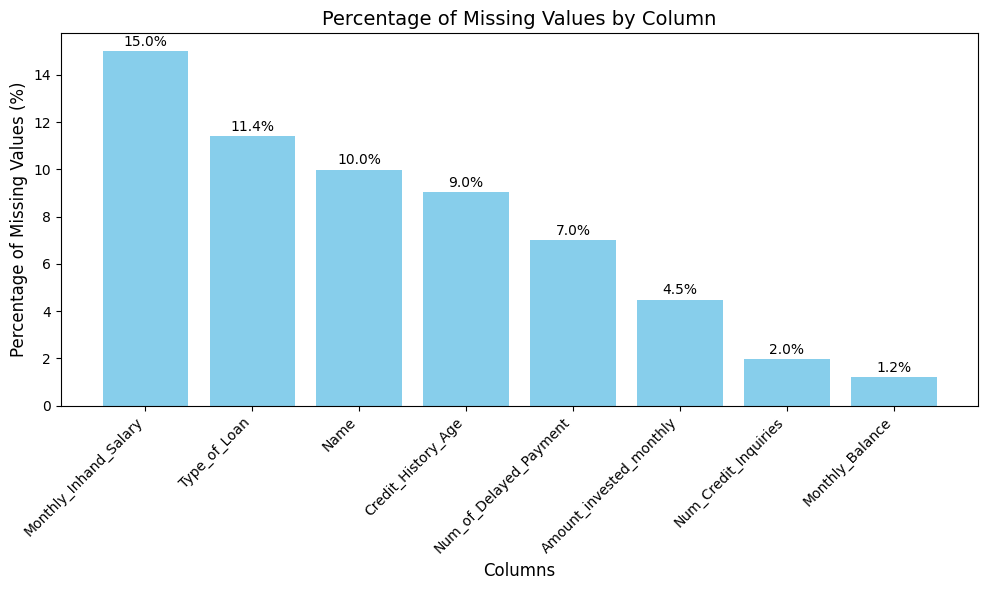

In [67]:
# Calculate the percentage of missing values
missing_percent = (df.isna().sum() / len(df)) * 100
missing_percent_filtered = missing_percent[missing_percent > 0].sort_values(ascending=False)

# Plotting the missing values as a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(missing_percent_filtered.index, missing_percent_filtered, color='skyblue')

# Adding percentage labels even closer to the bars
for bar, percent in zip(bars, missing_percent_filtered):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{percent:.1f}%', 
             ha='center', va='bottom', color='black', fontsize=10)

# Setting proper labels and title
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Percentage of Missing Values (%)", fontsize=12)
plt.title("Percentage of Missing Values by Column", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.savefig("missig_value_plot.png", dpi=300)
plt.show()
plt.close()

In [12]:
# The customer IDs for these rows/sampels are different
df[df.isna().sum(axis=1) == 5]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
896,0x1b42,CUS_0x365a,January,NaN,54,026-57-5729,Scientist,41345.58,NaN,0,5,10,0,NaN,7,3,2.42,4.0,_,646.47,23.041951,NaN,No,0.0,NaN,Low_spent_Small_value_payments,187.93428046477558,Standard
4490,0x3050,CUS_0x3019,March,NaN,51,346-10-4963,Writer,99007.68,8223.64,7,7,8,0,NaN,14,NaN,3.08,2.0,_,31.89,26.221277,NaN,No,0.0,NaN,High_spent_Small_value_payments,750.5733017643256,Good
7012,0x3f16,CUS_0x6171,May,NaN,52,584-89-4764,_______,149168.88,NaN,3,5,1,0,NaN,8,7,9.65,0.0,Good,903.48,43.610090,NaN,No,0.0,NaN,High_spent_Small_value_payments,1239.9888997857151,Good
56818,0x162ec,CUS_0x9ee4,March,NaN,7919,425-72-7007,Manager,102745.4,NaN,4,5,11,0,NaN,14,15,3.8,4.0,_,465.88,31.721489,NaN,No,0.0,NaN,High_spent_Large_value_payments,1036.0588129965113,Good
69031,0x1aa79,CUS_0x4eae,August,NaN,37,#F%$D@*&8,_______,44968.15,NaN,1,5,2,0,NaN,9,NaN,1.22,6.0,Good,871.85,34.451661,NaN,No,0.0,86.31346044034277,High_spent_Large_value_payments,506.52112289299055,Good
76326,0x1d538,CUS_0xa2ca,July,NaN,37,225-27-1573,Developer,37475.07,NaN,3,4,7,-100,NaN,14,NaN,9.77,7.0,Good,437.45_,26.222415,NaN,No,0.0,42.17219171407305,High_spent_Large_value_payments,505.220058285927,Good
92669,0x234fb,CUS_0x4203,June,NaN,42,857-44-8236,Musician,39649.74,NaN,5,3,5,0,NaN,15,NaN,1.47,7.0,Good,1338.65,40.444954,NaN,No,0.0,401.81986192160866,Low_spent_Small_value_payments,195.99463807839143,Standard


In [13]:
# Checking the number of occurences of each customer ID is same or not
(df["Customer_ID"].value_counts() == 8).all()

np.True_

In [14]:
# Checking if the data is available for same number of months for each customer
(df.groupby("Customer_ID")["Month"].count() == 8).all()

np.True_

In [15]:
# Checking if all month values for all customers are equal
filtered_month_group = df.groupby("Customer_ID")["Month"].unique()
filtered_month_group.apply(lambda x: set(x) == set(filtered_month_group.iloc[0])).all()

np.True_

In [16]:
# Filled missing values in NAME column
df["Name"] = df.groupby("Customer_ID")["Name"].transform(lambda x: x.fillna(x.mode()[0]))

In [17]:
# Converting values in Age "_28, _32, etc" to proper format

df["Age"] = df["Age"].str.strip("_").astype(dtype="int64")

In [18]:
df.groupby(["Customer_ID"]).Age.value_counts().head(30)

Customer_ID  Age 
CUS_0x1000   17      5
             18      3
CUS_0x1009   26      6
             25      2
CUS_0x100b   18      4
             19      4
CUS_0x1011   44      7
             43      1
CUS_0x1013   44      6
             43      2
CUS_0x1015   27      7
             4510    1
CUS_0x1018   15      8
CUS_0x1026   51      4
             52      4
CUS_0x102d   30      5
             31      3
CUS_0x102e   26      6
             25      2
CUS_0x1032   40      7
             1853    1
CUS_0x1037   44      5
             45      3
CUS_0x1038   27      6
             28      2
CUS_0x103e   40      8
CUS_0x1041   15      6
             14      2
CUS_0x1044   44      8
CUS_0x1048   27      6
Name: count, dtype: int64

In [19]:
# Removing age values less than 14 and more than 56 as they are errorneous data.

df.loc[(df["Age"] < 14) | (df["Age"] > 56), "Age"] = pd.NA

# Filling them with forward and backward fill values in a group (or) for a customer

df["Age"] = df.groupby("Customer_ID")["Age"].transform(lambda x: x.ffill().bfill())

In [20]:
# Removing '#F%$D@*&8' from SSN column

df.loc[df["SSN"] == "#F%$D@*&8", "SSN"] = pd.NA

df["SSN"] = df.groupby("Customer_ID")["SSN"].transform(lambda x: x.ffill().bfill())

In [21]:
df.Occupation.value_counts()

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [22]:
# Removing _______ from Occupation column

df["Occupation"] = df.groupby("Customer_ID")["Occupation"].transform(lambda x: x.where(x != "_______", x[x != "_______"].mode().iloc[0]))

In [23]:
# Handling missing values in Monthly_Inhand_Salary

df["Monthly_Inhand_Salary"] = df.groupby("Customer_ID")["Monthly_Inhand_Salary"].transform(lambda x: x.ffill().bfill())

In [24]:
# Converting Annual_Income values such as 34847.84_ into proper format

df["Annual_Income"] = df["Annual_Income"].str.strip("_").astype(dtype="float64")

In [25]:
# Replacing 'Annual_Income' values if they exceed 1.5 years' worth of 'Monthly_Inhand_Salary',
# to account for possible bonuses or other income sources.
# By doing this - all annual_income values of customers are one unique value

filtered_df = df.groupby("Customer_ID")["Annual_Income"].agg(lambda x: x.mode().iloc[0])

df.loc[df["Annual_Income"] > df["Monthly_Inhand_Salary"] * 18, "Annual_Income"] = df["Customer_ID"].map(filtered_df)

In [26]:
# Removing Num_Bank_Accounts values that are below 0 and above 11

df.loc[(df["Num_Bank_Accounts"] < 0) | (df["Num_Bank_Accounts"] > 11), "Num_Bank_Accounts", ] = pd.NA

df["Num_Bank_Accounts"] = df.groupby("Customer_ID")["Num_Bank_Accounts"].transform(lambda x: x.ffill().bfill())

In [27]:
# Removing Num_Credit_Card values that are more than 11

df.loc[df["Num_Credit_Card"] > 11, "Num_Credit_Card"] = pd.NA

df["Num_Credit_Card"] = df.groupby("Customer_ID")["Num_Credit_Card"].transform(lambda x: x.ffill().bfill())

In [28]:
# Removing Interest_Rate values that are more than 34 as the next largest value is 56 and its count is 1
# Filling the interest rate with mode

df.loc[df["Interest_Rate"] > 34, "Interest_Rate"] = pd.NA

df["Interest_Rate"] = df.groupby("Customer_ID")["Interest_Rate"].transform(lambda x: x.fillna(x.mode()[0]))

In [29]:
df.Num_of_Loan.value_counts().sort_index()

Num_of_Loan
-100     3876
0       10380
0_        550
1       10083
100         1
        ...  
991         1
995         1
996         1
999         1
9_        160
Name: count, Length: 434, dtype: int64

In [30]:
# Converting values in Num_of_Loan such as '9_' into proper format

df["Num_of_Loan"] = df["Num_of_Loan"].str.strip("_").astype(dtype='int64')

# Removing loan values < 0 and > 9

df.loc[(df["Num_of_Loan"] < 0) | (df["Num_of_Loan"] > 9),"Num_of_Loan"] = pd.NA

df["Num_of_Loan"] = df.groupby("Customer_ID")["Num_of_Loan"].transform(lambda x: x.ffill().bfill())

In [31]:
df["Type_of_Loan"].value_counts().sort_index().head(10)

Type_of_Loan
Auto Loan                                                                                                                                   1152
Auto Loan, Auto Loan, Auto Loan, Auto Loan, Credit-Builder Loan, Credit-Builder Loan, Mortgage Loan, and Personal Loan                         8
Auto Loan, Auto Loan, Auto Loan, Auto Loan, Student Loan, and Student Loan                                                                     8
Auto Loan, Auto Loan, Auto Loan, Credit-Builder Loan, Payday Loan, Not Specified, Payday Loan, Student Loan, and Debt Consolidation Loan       8
Auto Loan, Auto Loan, Auto Loan, Not Specified, Debt Consolidation Loan, and Credit-Builder Loan                                               8
Auto Loan, Auto Loan, Auto Loan, Not Specified, and Home Equity Loan                                                                           8
Auto Loan, Auto Loan, Auto Loan, Personal Loan, Student Loan, and Not Specified                                      

In [32]:
# Handling missing values for Type_of_Loan

# There are 11408 records with Type_of_Loan with NaN and Num_of_Loan with 0.
# Which means they might have not taken any loan

df.loc[df["Num_of_Loan"] == 0, "Type_of_Loan"] = "No Loan"
df["Type_of_Loan"] = df["Type_of_Loan"].str.replace(" and", "", regex=False)
df["Type_of_Loan"] = df["Type_of_Loan"].str.split(", ")

In [33]:
df.Type_of_Loan.isna().sum()

np.int64(0)

In [34]:
# Handling Missing values in Num_of_Delayed_Payment

# Converting values with "8_" to proper format:

df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].str.strip("_")
df["Num_of_Delayed_Payment"] = pd.to_numeric(df["Num_of_Delayed_Payment"], downcast="integer")

In [35]:
# Removing values less than 0 and more than 28 deyaled payments as the next value occurs at 46 and they are less frequent such as only 2 values

df.loc[(df["Num_of_Delayed_Payment"] < 0) |(df["Num_of_Delayed_Payment"] > 28),"Num_of_Delayed_Payment", ] = pd.NA

df["Num_of_Delayed_Payment"] = df.groupby("Customer_ID")["Num_of_Delayed_Payment"].transform(
        lambda x: x.ffill().bfill())

In [36]:
# Removing values such as "_" from Changed_Credit_Limit

df.loc[(df["Changed_Credit_Limit"] == "_"), "Changed_Credit_Limit"] = pd.NA

df["Changed_Credit_Limit"] = df.groupby("Customer_ID")["Changed_Credit_Limit"].transform(
        lambda x: x.ffill().bfill())

In [37]:
df["Changed_Credit_Limit"] = pd.to_numeric(df["Changed_Credit_Limit"], downcast="float").round(2)

In [38]:
# Handling Missing values and errorneous data in Num_Credit_Inquiries

df.loc[(df["Num_Credit_Inquiries"] > 17), "Num_Credit_Inquiries"] = pd.NA

df["Num_Credit_Inquiries"] = df.groupby("Customer_ID")["Num_Credit_Inquiries"].transform(lambda x: x.ffill().bfill())

In [39]:
# Checked if there are 3 type of Credit_Mix values for every Customer
# Removing "_" from Credit_Mix

df.loc[df["Credit_Mix"] == "_", "Credit_Mix"] = pd.NA

df["Credit_Mix"] = df.groupby("Customer_ID")["Credit_Mix"].transform(lambda x: x.fillna(x.mode()[0]))

In [40]:
df["Credit_Mix"].value_counts()

Credit_Mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64

In [41]:
# Converting values such as 1054.86_ in Outstanding_Debt column to proper format

df["Outstanding_Debt"] = df["Outstanding_Debt"].str.strip("_").astype(dtype="float")

In [42]:
# Converting Credit_History_Age to Months

def convert_age_to_months(history_age):
    if pd.notna(history_age):  # NaN checking
        match = re.match(r"(\d+) Years\s*and\s*(\d+) Months", history_age)  # Regex 
        if match:
            years = int(match.group(1))
            months = int(match.group(2))
            total_months = years * 12 + months
            return total_months
    return pd.NA

df["Credit_History_Age"] = df["Credit_History_Age"].transform(convert_age_to_months)

In [43]:
# Handling Missing values in Credit_History_Age

def fill_nan(group):
    # Loop to fill NaN values
    for i in range(len(group)):
        if pd.isna(group["Credit_History_Age"].iloc[i]):
            # Get the previous value
            if i > 0:
                group["Credit_History_Age"].iloc[i] = (
                    group["Credit_History_Age"].iloc[i - 1] + 1)
            else:
                group["Credit_History_Age"].iloc[
                    i] = pd.NA  # The first value may still remain NaN

    # Fill remaining NaN values with one less than the next value
    for i in range(len(group) - 1, -1, -1):
        if pd.isna(group["Credit_History_Age"].iloc[i]):
            if i < len(group) - 1:
                group["Credit_History_Age"].iloc[i] = (
                    group["Credit_History_Age"].iloc[i + 1] - 1)

    return group

df = df.groupby("Customer_ID", group_keys=False).apply(fill_nan)

/var/folders/jq/hnmg04c105bgc7fnqsfpy02r0000gn/T/ipykernel_15829/3587777764.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  group["Credit_History_Age"].iloc[i] = (
/var/folders/jq/hnmg04c105bgc7fnqsfpy02r0000gn/T/ipykernel_15829/35877777

In [44]:
df["Credit_History_Age"] = df.Credit_History_Age.astype("int64")

In [45]:
# Handling incorrect value "NM" in Payment_of_Min_Amount

df["Payment_of_Min_Amount"] = df.groupby("Customer_ID")["Payment_of_Min_Amount"].transform(
        lambda x: x.replace("NM", x[x != "NM"].iloc[0]))

In [46]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"[Auto Loan, Credit-Builder Loan, Personal Loan...",3,7.0,11.27,4.0,Good,809.98,26.822620,265,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"[Auto Loan, Credit-Builder Loan, Personal Loan...",-1,7.0,11.27,4.0,Good,809.98,31.944960,266,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"[Auto Loan, Credit-Builder Loan, Personal Loan...",3,7.0,11.27,4.0,Good,809.98,28.609352,267,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"[Auto Loan, Credit-Builder Loan, Personal Loan...",5,4.0,6.27,4.0,Good,809.98,31.377862,268,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"[Auto Loan, Credit-Builder Loan, Personal Loan...",6,4.0,11.27,4.0,Good,809.98,24.797347,269,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [47]:
#The value of total_emi_per_month is typically around 30%-40% of the monthly income.
#In this case for each customer's id, there are at most 4(only 1) 
#different unique total_emi_per_month values
#exceeding 30% of their monthly income and their value_counts is only 1

df.loc[df["Total_EMI_per_month"] > df["Monthly_Inhand_Salary"] * 0.3,
        "Total_EMI_per_month"] = pd.NA

df["Total_EMI_per_month"] = df.groupby(
    "Customer_ID")["Total_EMI_per_month"].transform(
        lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

In [48]:
# Checking for errorneous values and multiple counts for Total_EMI_per_month of a customer

filtered_df = df.groupby("Customer_ID")["Total_EMI_per_month"].nunique().loc[lambda x: x > 1].index

#More than 1 unique total_emi_per_month and their value_counts
filtered_df = df[df["Customer_ID"].isin(filtered_df)].groupby("Customer_ID")["Total_EMI_per_month"].value_counts()

for (customer_id, emi_value), count in filtered_df.items():
    # Check if the count of total_emi_per_month is 1
    if count == 1:
        # Extract total_emi_per_month values for the current customer_id
        customer_data = df[df["Customer_ID"] ==
                            customer_id]["Total_EMI_per_month"]

        # Check if the current emi_value is not the first or last value
        if not (emi_value == customer_data.iloc[0]
                or emi_value == customer_data.iloc[-1]):
            # Get the mode value
            mode_value = customer_data.mode()
            # Replace the emi_value with the mode
            df.loc[(df["Customer_ID"] == customer_id) &
                    (df["Total_EMI_per_month"] == emi_value),
                    "Total_EMI_per_month"] = mode_value[0]

In [49]:
# Handling missing values and incorrect data in Amount_invested_monthly

df["Amount_invested_monthly"] = df["Amount_invested_monthly"].str.strip("_").astype(dtype=float)

df["Amount_invested_monthly"] = df.groupby(
    "Customer_ID")["Amount_invested_monthly"].transform(lambda x: x.ffill().bfill())

In [50]:
# Removing errorneous value "!@9#%8" from Payment_Behaviour

df.loc[(df["Payment_Behaviour"] == "!@9#%8"), "Payment_Behaviour"] = pd.NA

df["Payment_Behaviour"] = df.groupby("Customer_ID")["Payment_Behaviour"].transform(lambda x: x.ffill().bfill())

In [51]:
# Handling missing and errorneous data in Monthly_Balance such as "__-333333333333333333333333333__"

df['Monthly_Balance'] = df['Monthly_Balance'].apply(
    lambda x: x.replace('_', '').replace('-', '') if isinstance(x, str) else x).astype('float')

In [52]:
# Replacing the errorneous monthly balance value 333333333333333314856026112 with mean of customer id group

mask = df["Monthly_Balance"] == 333333333333333314856026112

df.loc[mask, "Monthly_Balance"] = df.loc[mask, "Customer_ID"].map(
    df[df["Monthly_Balance"] != 333333333333333314856026112].groupby(
        "Customer_ID")["Monthly_Balance"].mean())

df["Monthly_Balance"] = df.groupby(
    "Customer_ID")["Monthly_Balance"].transform(lambda x: x.fillna(x.mean()))

In [53]:
# Saving the cleaned dataset

df.to_csv(path_or_buf="credit_score_dataset.csv", index=False)